All of the code presented in this notoebook is derived from or based on the O'Reilly&reg; book Introduction to Machine Learning with Python &copy; 2017 by Andreas C. Muller and Sarah Guido.  Please make sure you present the correct attestation to this book if you reference or utilize any of the information in this notebook.  And please buy the book, it's excellent!

Linear Support Vector Machines https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [86]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, axes3d
import numpy as np

Text(0, 0.5, 'f 1')

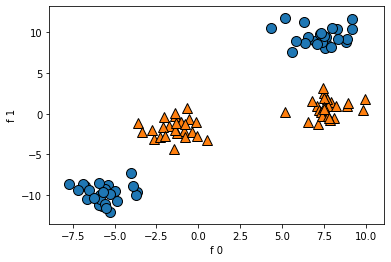

In [87]:
X,y = make_blobs(centers=4,random_state=8)
y = y % 2; # Converts integer y to a binary classifier
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("f 0")
plt.ylabel("f 1")

First model works with 2 features

Text(0, 0.5, 'f 1')

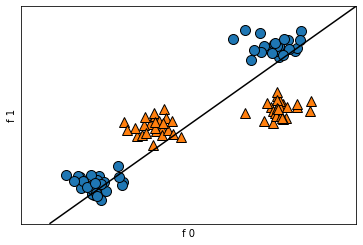

In [90]:
linear_svm = LinearSVC(max_iter=5000).fit(X,y)
mglearn.plots.plot_2d_separator(linear_svm,X) # Could also do this with linspace
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("f 0")
plt.ylabel("f 1")

Second model works with 3 features

In [91]:
new_feature = X[:, 1:] ** 2  # Add a new feature to the data set
X = np.hstack([X, new_feature])

Text(0.5, 0, 'f 2')

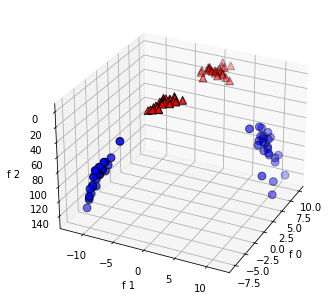

In [93]:
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X[mask,0], X[mask,1], X[mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X[~mask,0], X[~mask,1], X[~mask,2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("f 0")
ax.set_ylabel("f 1")
ax.set_zlabel("f 2")

In [94]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new,y)
coef = linear_svm_3d.coef_.ravel()
intercept = linear_svm_3d.intercept_

Plot of devision boundary by linearSVM for dataset with 3 features

Text(0.5, 0, 'Feature 1 ** 2')

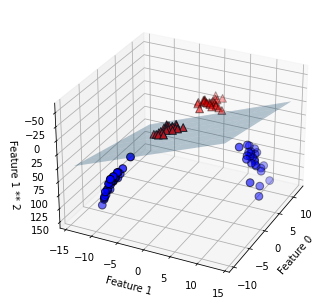

In [95]:
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
ax.scatter(X[mask,0], X[mask,1], X[mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X[~mask,0], X[~mask,1], X[~mask,2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

xx = np.linspace(X[:,0].min()-2, X[:,0].max()+2,50)
yy = np.linspace(X[:,1].min()-2, X[:,1].max()+2,50)
XX,YY = np.meshgrid(xx,yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")